# Image Captioning with Multimodal 11B LLaMA 3.2-Vision (Ollama)

The Ollama version of 11B LLaMA 3.2-Vision was easy to install and use. It ran very quickly and produced great results right "out of the box" making it much better choice overall than Hugging Face's 20GB LLaMA 3.2-Vision model.

This Notebook shows how to install and query images using Ollama.

The first time you run a query it may take a little longer to get results back while the model is loaded into memory but if you re-run the cell results should be faster.

To install Ollama download the Windows, macOS or Linux versions from the [**Ollama download page**](https://ollama.com/download).

Ollama can also run as a standalone application that runs outside of your Python environment. 

#### Verify GPU

In [24]:
import torch; print("torch", torch.__version__, "| cuda:", torch.cuda.is_available())

torch 2.5.1+cu121 | cuda: True


### Simple Ollama text query

In [4]:
# Simple Ollama test of text
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='llama3.2-vision', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
print(response['message']['content'])
# or access fields directly from the response object
print(response.message.content)

The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh. Here's a simplified explanation:

1. **Sunlight**: The sun emits a wide range of electromagnetic radiation, including visible light. When sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).
2. **Scattering**: These gas molecules scatter the sunlight in all directions. However, they scatter shorter (blue) wavelengths more than longer (red) wavelengths. This is because the smaller molecules are more effective at scattering the shorter wavelengths.
3. **Blue light dominance**: As a result of this scattering, the blue light is dispersed in all directions and reaches our eyes from all parts of the sky. The blue light is scattered in a way that it is distributed evenly throughout the atmosphere, giving the sky its blue appearance.
4. **Atmospheric conditions**: The exact shade of blue can vary depending on atmos

### Ollama image query

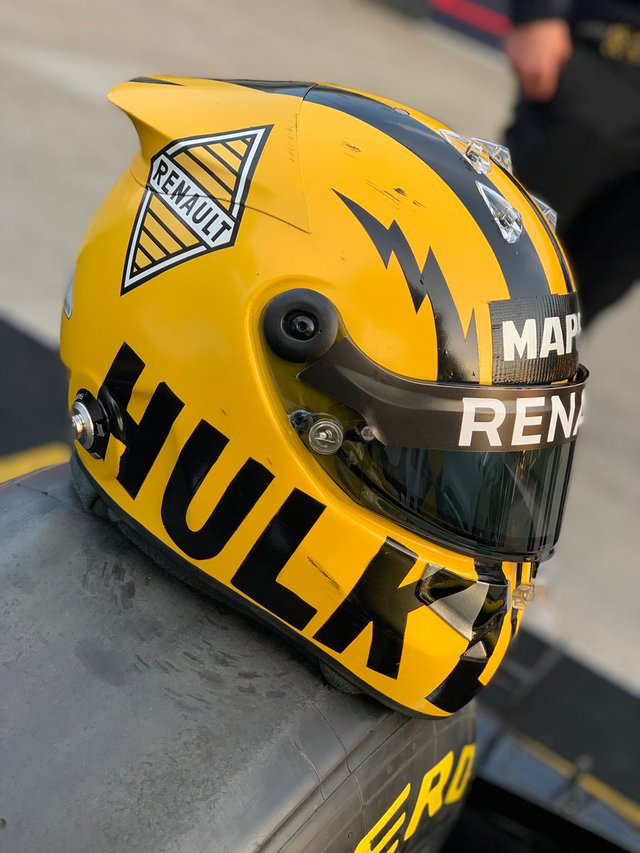

The image shows a yellow and black motorcycle helmet with the word "HULK" on the side. The helmet is yellow with black accents and has a clear visor. It is sitting on a black surface, possibly a motorcycle seat or a table. The helmet appears to be a racing helmet, as it has a distinctive shape and design that is typical of racing helmets. The word "HULK" is written in large, bold letters on the side of the helmet, which suggests that the helmet may be associated with a particular rider or team. Overall, the image suggests that the helmet is a high-performance, racing helmet that is designed for use in competitive motorcycle racing. 

Model: llama3.2-vision
Created at: 2025-08-29T11:51:58.1314673Z
Duration: 2.26


In [6]:
from PIL import Image
import ollama
from ollama import chat
from ollama import ChatResponse

image = r'assets\Hulk-helmet.jpg'
display_image = Image.open(image).convert("RGB")
display(display_image)

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'What is in this image?',
         # Python client accepts local file paths here; it will base64 them for you.
        'images': [image],
    }]
)
print(response.message.content, "\n")
print("Model:", response.model)
print("Created at:", response.created_at)
print(f"Duration: {response.total_duration/1000000000:.2f}")

### Ollama image query using streaming

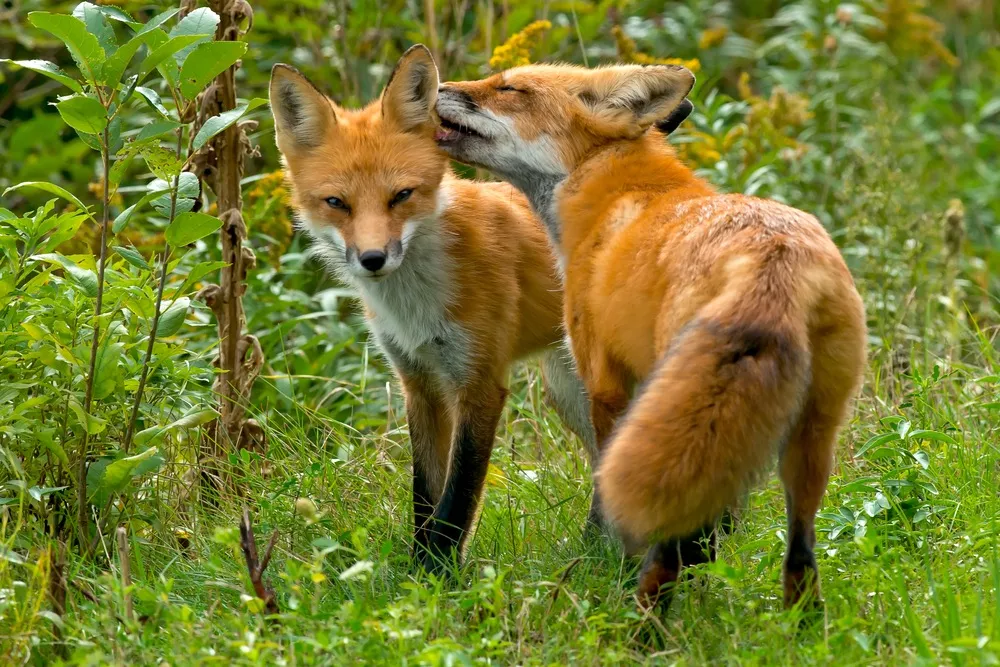

The image shows two red foxes in a grassy field. The fox on the left is standing, looking at the camera, while the fox on the right is standing with its head turned to the left and its mouth open, as if it is licking the other fox's ear. The fox on the right has its tail raised and its body turned away from the camera. Both foxes are looking in the same direction, as if they are aware of something in the distance. The background is a grassy field with some green plants and yellow flowers. The overall atmosphere of the image is one of friendship and affection between the two foxes.

In [8]:
from PIL import Image
import ollama

image = r'assets\Courting-foxes.jpg'
display_image = Image.open(image).convert("RGB")
display(display_image)

stream = ollama.chat(
    model='llama3.2-vision',
    messages = [{
        'role': 'user',
        'content': 'Can you explain this image to me?',
         # Python client accepts local file paths here; it will base64 them for you.
        'images': [image],
    }],
    stream = True,
)
for chunk in stream:
    print(chunk['message']['content'], end='', flush = True)

### Prompting with System Policies

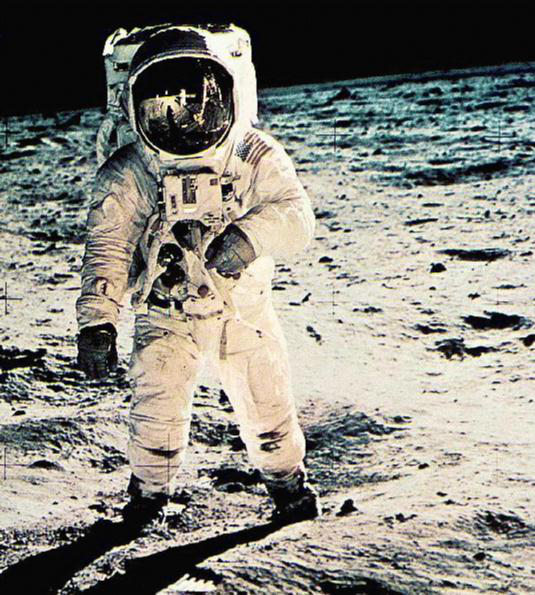

The image depicts an astronaut on the moon's surface, clad in a white spacesuit and helmet. The astronaut is positioned in the center of the image, with their body facing the camera and their head turned slightly to the left. They are wearing a white spacesuit with a large helmet that covers their entire head, including their face. The helmet has a clear visor that allows the astronaut to see out, and it is equipped with a microphone and other communication devices.

The background of the image is the moon's surface, which is covered in a layer of gray dust and rocks. The horizon stretches out into the distance, curving slightly due to the moon's curvature. The sky above is black, with no stars or other celestial objects visible.

Overall, the image provides a sense of the vastness and desolation of the moon's surface, as well as the sense of accomplishment and wonder that comes with exploring a new and uncharted world.

In [21]:
from PIL import Image
from IPython.display import display
import ollama

img_path = 'assets/Moonwalk.jpg'

opts = {
    'temperature': 0.3,
    'repeat_penalty': 1.1,
    # optional: 'num_predict': 200, 'top_p': 0.9, ...
}

messages = [
    {'role': 'system',
     'content': "You are a crisp, objective image captioner. "
                "If no people are present, do not mention privacy or identity policies. "
                "Avoid disclaimers; describe only visible content."},
    {'role': 'user',
     'content': 'Describe this image concisely.',
     'images': [img_path]},
]

display(Image.open(img_path).convert("RGB"))

for chunk in ollama.chat(model='llama3.2-vision',
                         messages=messages,
                         options=opts,
                         stream=True):
    print(chunk['message']['content'], end='', flush=True)

## Generating diffusion model prompts

Generating images from text is not directly supported in Ollama which requires an image engine such as as Stable Diffusion or FLUX.1. However, it can generate prompts that can be used on those systems.

In [15]:
import ollama, requests, base64, json

# 1) Ask Ollama to write a single SDXL-style prompt
sys = "You write one-line Stable Diffusion prompts. No extras."
user = "Two red foxes grooming in a meadow at golden hour, telephoto wildlife shot, shallow depth of field, natural colors"
r = ollama.chat(model="llama3.2-vision", messages=[{"role":"system","content":sys},
                                            {"role":"user","content":user}])
prompt = r["message"]["content"].strip()

print("Prompt: ",prompt)

Prompt:  A pair of red foxes in a lush meadow, their fur a vibrant contrast to the warm, golden light of sunset, captured in a telephoto wildlife shot with a shallow depth of field, showcasing the natural colors of the scene.


In [ ]:
# 2) Send to A1111 txt2img for automatic generation
payload = {"prompt": prompt, "steps": 28, "cfg_scale": 7, "width": 1024, "height": 1024}
resp = requests.post("http://127.0.0.1:7860/sdapi/v1/txt2img", json=payload).json()
img_b64 = resp["images"][0]
with open("out.png","wb") as f:
    f.write(base64.b64decode(img_b64))
print("Saved out.png")

### Modelfile with baked prompt and defaults
```dockerfile
FROM llama3.2-vision:11b
SYSTEM You are a crisp, objective image captioner. If no people are present, do not mention privacy or identity policies. Avoid disclaimers.
PARAMETER temperature 0.3
PARAMETER repeat_penalty 1.1
```

This can be baked into the LLaMA3.2-vision captioner like this
```bash
ollama create llama3.2-vision:11b-captioner -f Modelfile
ollama run llama3.2-vision:11b-captioner
```

## Batch laelling images in folders

JSONL is a great choice for storing the labels. 
+ JSONL: best for large runs; append-friendly, resumable, streaming-friendly.
+ Sidecar JSON: great for simple folder workflows or sharing individual images with their metadata.
+ CSV: handy for quick browsing or spreadsheet review (but loses nesting).

Bonus: If you use cataloging tools such as Lightroom or Darktable, you can also embed the caption as IPTC/XMP later (e.g., with exiftool) using the JSONL/sidecars as the source. 

exiftool could even be used to overwrite metadata inside iamges with a command such as:
```bash
exiftool -overwrite_original -json=animals_captions.jsonl -iptc:Caption-Abstract<${result.caption} -XMP-dc:Subject<${result.tags}  *.jpg
```
**NOTE**: if you are going to use this tool to overwrite metadata make a copy of thje images first!!

For batches use:
+ JSONL (JSON Lines) as the master log: one JSON object per line → easy to append, stream, resume, and grep.
+ (Optional) sidecar JSON next to each image (photo.jpg.json) so other tools can pick it up per-file.
+ (Optional) CSV export for a quick spreadsheet view.

Below is a clean, resilient batch captioner for Ollama that writes JSONL and optional sidecars. It also resumes if you re-run it.

## Batch labelling script

In [22]:
# pip install ollama
from pathlib import Path
import json, csv, time
import ollama

MODEL = 'llama3.2-vision:11b'

SYSTEM = (
    "You are a concise, objective image captioner. "
    "If no people are present, do not mention privacy or identity policies. "
    "Avoid disclaimers. Return ONLY valid JSON."
)

# Keep keys stable so downstream code is easy
USER_INSTRUCTION = (
    "Describe the image and return JSON with these keys:\n"
    '  "caption": short 1–2 sentence description,\n'
    '  "tags": 5–10 concise nouns (lowercase),\n'
    '  "objects": up to 10 concrete things if present,\n'
    '  "colors": up to 3 dominant colors,\n'
    '  "people": true/false if any humans are visible.\n'
    "No extra text; JSON only."
)

def iter_images(folder, exts=('.jpg','.jpeg','.png','.webp','.bmp','.tif','.tiff')):
    for p in sorted(Path(folder).rglob('*')):
        if p.suffix.lower() in exts:
            yield p

def load_processed(jsonl_path):
    done = set()
    p = Path(jsonl_path)
    if p.exists():
        with p.open('r', encoding='utf-8') as f:
            for line in f:
                try:
                    obj = json.loads(line)
                    done.add(obj.get('file'))
                except Exception:
                    pass
    return done

def write_jsonl(jsonl_path, record):
    with Path(jsonl_path).open('a', encoding='utf-8') as f:
        f.write(json.dumps(record, ensure_ascii=False) + '\n')

def caption_one(image_path, temperature=0.3, repeat_penalty=1.05):
    # Ask Ollama to return strict JSON
    messages = [
        {'role':'system','content': SYSTEM},
        {'role':'user','content': USER_INSTRUCTION, 'images':[str(image_path)]},
    ]
    # Note: the Python client supports 'format="json"' parameter. If your version
    # doesn’t, move it into options={'format':'json'}.
    t0 = time.time()
    resp = ollama.chat(
        model=MODEL,
        messages=messages,
        options={'temperature': temperature, 'repeat_penalty': repeat_penalty, 'num_predict': 200},
        format='json',         # enforce valid JSON output
        stream=False,
    )
    dt = time.time() - t0

    # Parse JSON content
    data = json.loads(resp['message']['content'])
    # Normalize a bit
    data.setdefault('tags', [])
    data.setdefault('objects', [])
    data.setdefault('colors', [])
    data['tags']    = [t.strip().lower() for t in data['tags'] if isinstance(t, str)]
    data['objects'] = [o.strip().lower() for o in data['objects'] if isinstance(o, str)]
    data['colors']  = [c.strip().lower() for c in data['colors'] if isinstance(c, str)]
    data['people']  = bool(data.get('people', False))

    # Attach metadata for traceability
    record = {
        'file': str(image_path),
        'model': MODEL,
        'latency_s': round(dt, 3),
        'result': data,
    }
    return record

def caption_folder(
    folder,
    out_jsonl='captions.jsonl',
    make_sidecars=True,
    temperature=0.3,
    repeat_penalty=1.05,
):
    folder = Path(folder)
    Path(out_jsonl).parent.mkdir(parents=True, exist_ok=True)
    processed = load_processed(out_jsonl)

    count = 0
    for img in iter_images(folder):
        if str(img) in processed:
            continue
        try:
            rec = caption_one(img, temperature=temperature, repeat_penalty=repeat_penalty)
            write_jsonl(out_jsonl, rec)
            if make_sidecars:
                sidecar = img.with_suffix(img.suffix + '.json')  # e.g., cat.jpg.json
                sidecar.write_text(json.dumps(rec['result'], ensure_ascii=False, indent=2), encoding='utf-8')
            print(f"[ok] {img}  ({rec['latency_s']}s)")
            count += 1
        except Exception as e:
            print(f"[err] {img} → {e}")
    print(f"Done. Wrote {count} new records to {out_jsonl}")

# --- run it ---
# caption_folder(r"C:\OllamaImages\Animals", out_jsonl="animals_captions.jsonl", make_sidecars=True)

### Convert JSONL to CSV

In [23]:
import json, csv
def jsonl_to_csv(jsonl_path, csv_path):
    rows = []
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            obj = json.loads(line)
            r = obj['result']
            rows.append({
                'file': obj['file'],
                'caption': r.get('caption',''),
                'tags': ', '.join(r.get('tags',[])),
                'objects': ', '.join(r.get('objects',[])),
                'colors': ', '.join(r.get('colors',[])),
                'people': r.get('people', False),
                'latency_s': obj.get('latency_s', None),
            })
    with open(csv_path, 'w', newline='', encoding='utf-8') as f:
        w = csv.DictWriter(f, fieldnames=rows[0].keys())
        w.writeheader(); w.writerows(rows)

# --- run it ---        
# jsonl_to_csv("animals_captions.jsonl", "animals_captions.csv")